In [15]:
#로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping



import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 불러온데이터를 학습시켜 데이터셋으로 나누기
(X_train, y_train),(X_test,y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [5]:
category = np.max(y_train) + 1
print(category,'카테고리')
print(len(X_train),'학습용 뉴스 기사')
print(len(X_test),'테스트용 뉴스기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:


#단어의 수를 맞추어 줍니다.
X_train =sequence.pad_sequences(X_train,maxlen=100)
X_test = sequence.pad_sequences(X_test,maxlen=100)

In [8]:
# 원-핫 인코딩 처리를 합나다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [9]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46,activation='softmax'))

#모델의 실행 옵션을 정합니다
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#학습의 조기 중단을 설정합니다.
early_stopping_callback =EarlyStopping(monitor='val_loss',patience=5)

In [10]:
#모델을 실행합니다 .
history = model.fit(X_train,y_train,batch_size=20,epochs=200,validation_data=(X_test,y_test),callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 14s 29ms/step - loss: 2.1383 - accuracy: 0.4579 - val_loss: 1.8874 - val_accuracy: 0.5272
Epoch 2/200
450/450 [==============================] - 13s 28ms/step - loss: 1.8003 - accuracy: 0.5355 - val_loss: 1.7171 - val_accuracy: 0.5583
Epoch 3/200
450/450 [==============================] - 13s 28ms/step - loss: 1.7036 - accuracy: 0.5615 - val_loss: 1.6987 - val_accuracy: 0.5806
Epoch 4/200
450/450 [==============================] - 13s 28ms/step - loss: 1.6985 - accuracy: 0.5721 - val_loss: 1.6354 - val_accuracy: 0.5997
Epoch 5/200
450/450 [==============================] - 13s 28ms/step - loss: 1.5016 - accuracy: 0.6172 - val_loss: 1.5053 - val_accuracy: 0.6215
Epoch 6/200
450/450 [==============================] - 12s 27ms/step - loss: 1.4037 - accuracy: 0.6448 - val_loss: 1.4267 - val_accuracy: 0.6420
Epoch 7/200
450/450 [==============================] - 14s 31ms/step - loss: 1.3231 - accuracy: 0.6646 - val_loss: 1.3970 - val_ac

In [13]:
#테스트의 정확도를 출력합니다. 
print('\n 테스트 정확도 : %.4f' %(model.evaluate(X_test,y_test)[1]))


#검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

71/71 [==============================] - 1s 10ms/step - loss: 1.2072 - accuracy: 0.7204

 테스트 정확도 : 0.7204


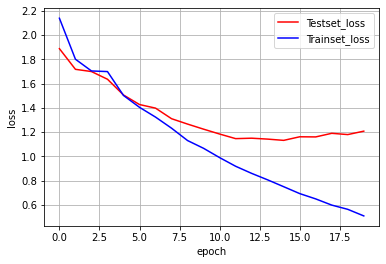

In [17]:
#그래프로 표현 
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='',c='blue',label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표기하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

